In [1]:
import numpy as np

# The Normal Equation

In [8]:
np.random.seed(42)
m=100
X = 2 * np.random.rand(m,1)
y = 4+ 3*X+np.random.randn(m,1)

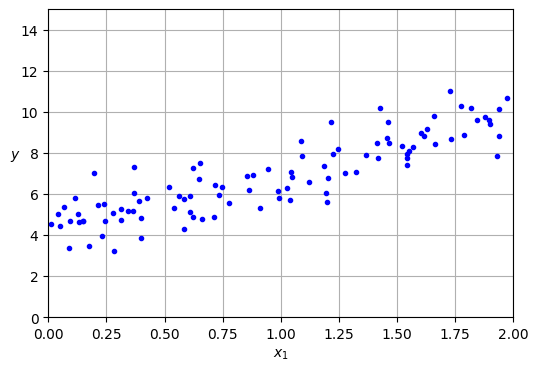

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.savefig("generated_data_plot")
plt.show()

In [14]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @y

In [15]:
theta_best


array([[4.21509616],
       [2.77011339]])

In [17]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

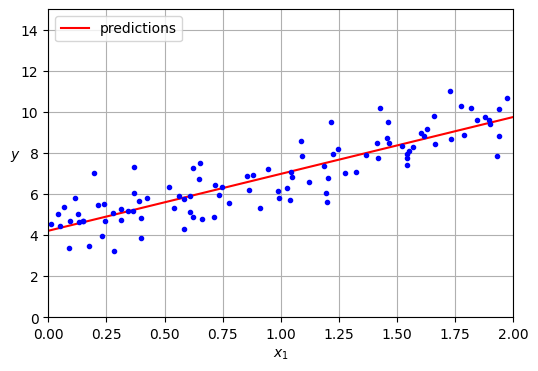

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6,4))
plt.plot(X_new,y_predict,"r-",label="predictions")
plt.plot(X,y,"b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.savefig("linear_model_predictions_plot")

plt.show()

# applying the gradient descent 

In [ ]:
eta = 0.1 
n_iterations = 1000
m = 100 

theta = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T